In [211]:
import pandas as pd

data_cpi_exr = pd.read_csv('data/EXR_CPI_Inflation.csv', header=0).dropna()
data_gdp_exr = pd.read_csv('data/EXR_GDP_EXRgrowth.csv', header=0).dropna()

data_cpi_exr.head()
#data_gdp_exr.tail()

,half_year,exchange_rate,CPI,inflation
0,1993-H1,1.630887,67.631667,1.505212
1,1993-H2,1.597829,68.649667,2.068473
2,1994-H1,1.567529,70.069667,2.057952
3,1994-H2,1.485443,71.511667,0.308108
4,1995-H1,1.418135,71.732000,0.424729


In [212]:
data_gdp_exr = data_gdp_exr.drop(columns=['exchange_rate', 'exc_growth'])
merged = pd.merge(data_cpi_exr, data_gdp_exr, on='half_year')
merged

,half_year,exchange_rate,CPI,inflation,GDP
0,1993-H1,1.630887,67.631667,1.505212,10.65
1,1993-H2,1.597829,68.649667,2.068473,12.20
2,1994-H1,1.567529,70.069667,2.057952,11.90
3,1994-H2,1.485443,71.511667,0.308108,10.40
4,1995-H1,1.418135,71.732000,0.424729,6.20
5,1995-H2,1.414817,72.036667,0.670955,8.10
6,1996-H1,1.410565,72.520000,0.743243,10.30
7,1996-H2,1.408057,73.059000,1.138806,4.90
8,1997-H1,1.427177,73.891000,1.649276,7.60
9,1997-H2,1.541633,75.109667,-1.461419,9.00


In [213]:
features = merged[['CPI', 'inflation', 'GDP']]
targets  = merged['exchange_rate']

Linear Regression

In [214]:
#ML model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

model = LinearRegression()
model.fit(features, targets)

#Predict EXR
predictions = model.predict(features)
mse = mean_squared_error(predictions, targets)
mse

0.00978355957509578

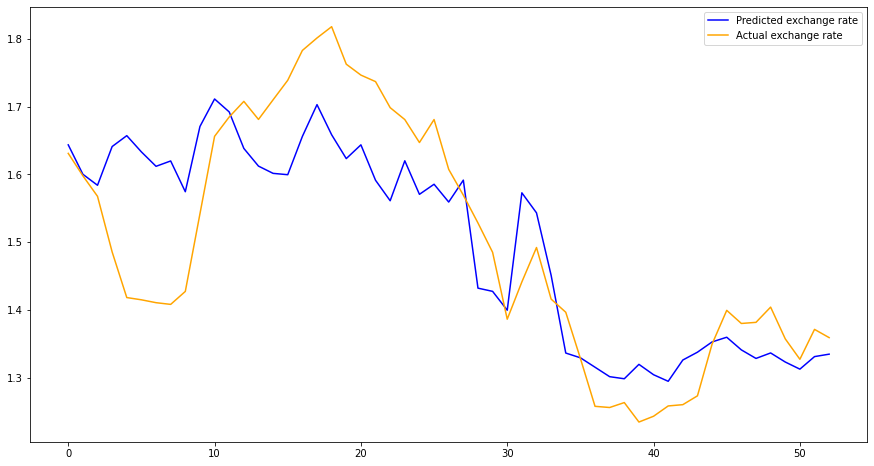

In [215]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(predictions, color='blue', label='Predicted exchange rate')
ax.plot(targets, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()

In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.3)

model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(predictions, Y_test)
print(mse)

0.009348883864801889


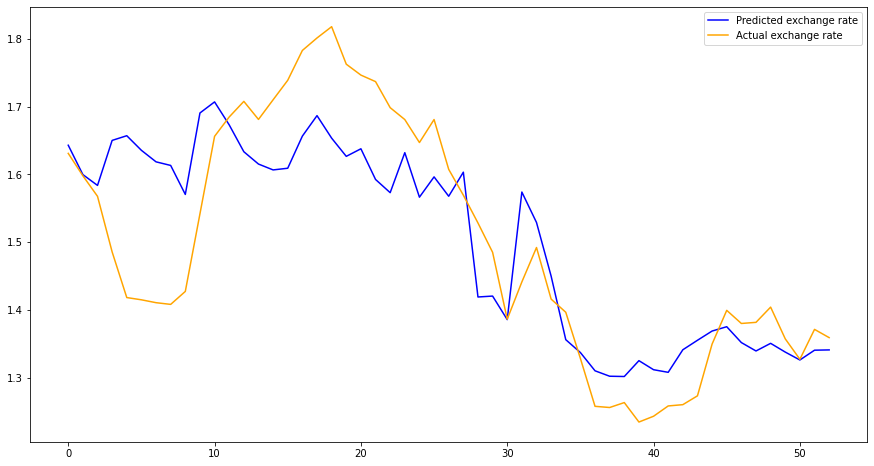

In [217]:
predictions = model.predict(features)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(predictions, color='blue', label='Predicted exchange rate')
ax.plot(targets, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()

In [218]:
simulated_data =[121, 0.3, 3]
predicted_exr = model.predict([simulated_data])
print(predicted_exr)

[1.06853615]


Decision Tree

In [219]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [220]:
model = DecisionTreeRegressor()
model.fit(features, targets)
predictions = model.predict(features)
mse = mean_squared_error(predictions, targets)
print(mse)

0.0


y = f(x) =ax+by+cz
loss =(y-yhat)**2


In [221]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.3)

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(predictions, Y_test)
print(mse)

#Ml models are not like maths, 
#because it is optimized using a stochastic algorithm the solutions set is very wide for one problem

0.003756953093386183


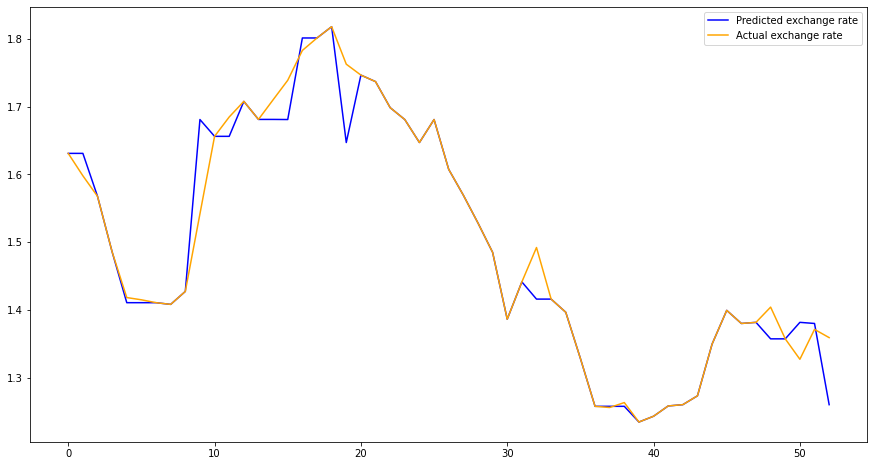

In [222]:
predictions = model.predict(features)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(predictions, color='blue', label='Predicted exchange rate')
ax.plot(targets, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()

AdaBoost

In [223]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [224]:
model = AdaBoostRegressor()
model.fit(features, targets)

#Predict EXR
predictions = model.predict(features)
mse = mean_squared_error(predictions, targets)
mse

0.0014480708668452023

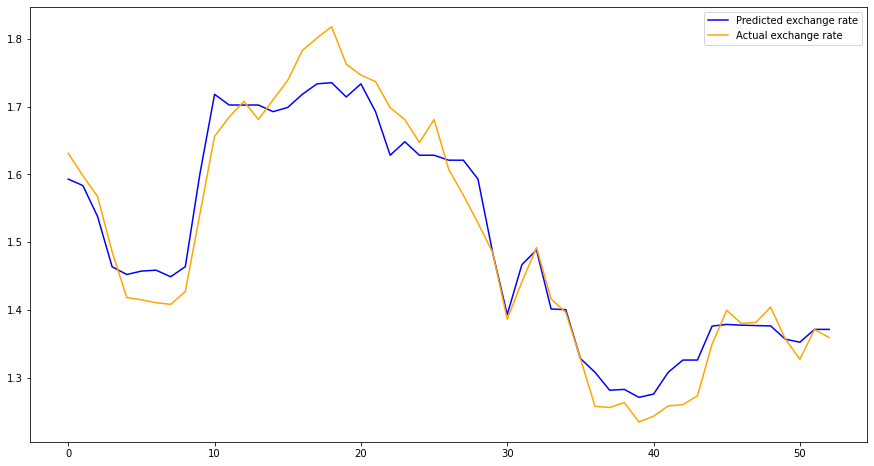

In [225]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(predictions, color='blue', label='Predicted exchange rate')
ax.plot(targets, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()

In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.3)

model = AdaBoostRegressor()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(predictions, Y_test)
print(mse)

0.006616303474931953


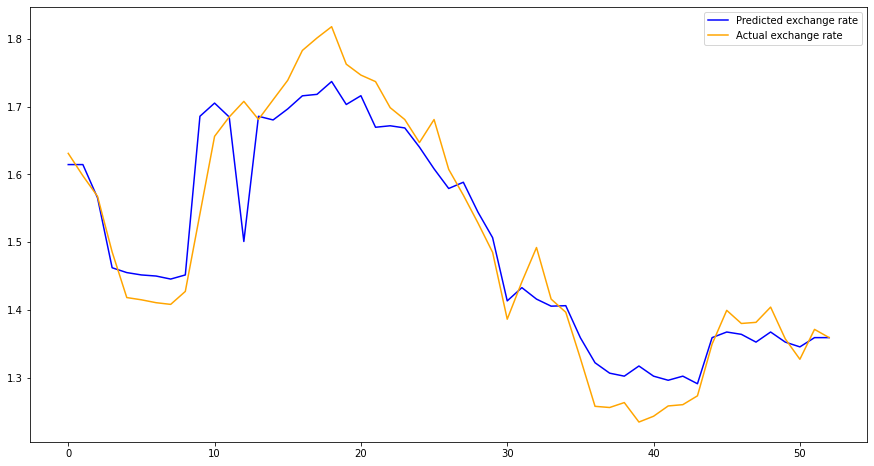

In [227]:
predictions = model.predict(features)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(predictions, color='blue', label='Predicted exchange rate')
ax.plot(targets, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()

Random Forest  

In [228]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()
model.fit(features, targets)

predictions = model.predict(features)
mse = mean_squared_error(predictions, targets)
mse

0.0008284977388938325

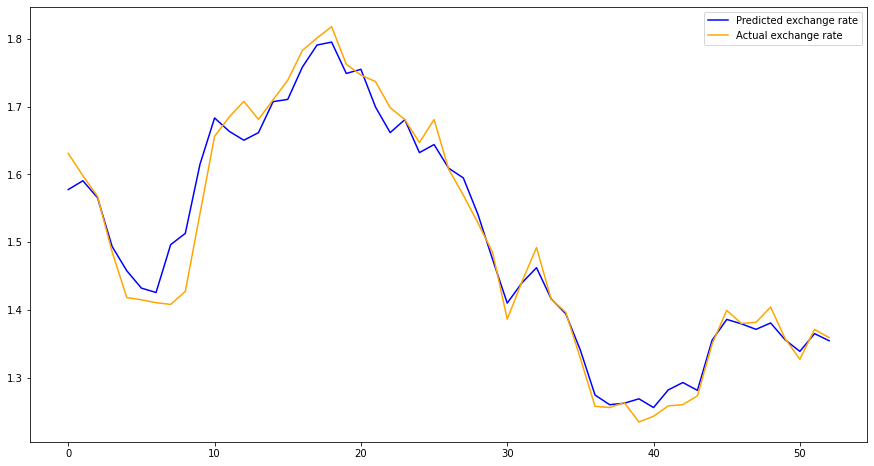

In [229]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(predictions, color='blue', label='Predicted exchange rate')
ax.plot(targets, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.3)

model = RandomForestRegressor()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(predictions, Y_test)
print(mse)

0.00727193814579561


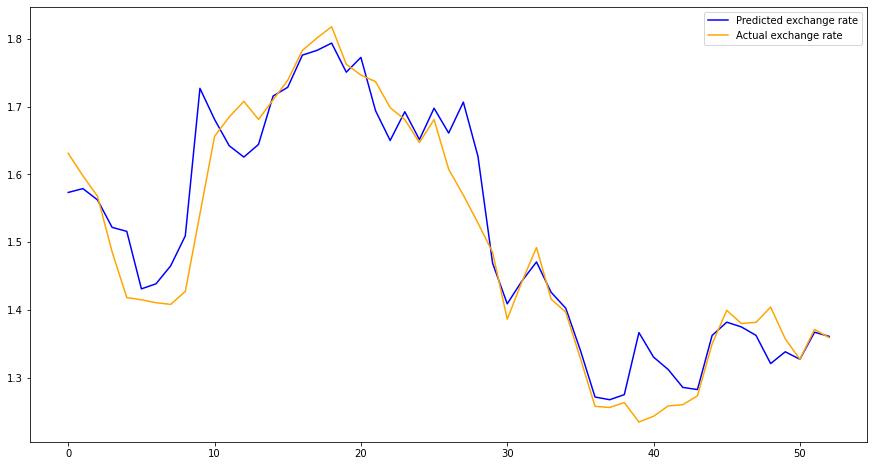

In [231]:
predictions = model.predict(features)
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(predictions, color='blue', label='Predicted exchange rate')
ax.plot(targets, color='orange', label='Actual exchange rate')
plt.legend()
plt.show()